In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Preprocess Dataset

In [3]:
cols = [
    "area", "perimeter", "compactness", "length",
    "width", "asymmetry", "groove", "class",
]
df = pd.read_csv("data/seeds_dataset.txt", sep="\s+", names=cols)
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## K-means Clustering (based on two features)

In [4]:
from sklearn.cluster import KMeans

In [36]:
x1 = "perimeter"
x2 = "asymmetry"
X = df[[x1, x2]].values
y = df["class"].values

In [44]:
kmeans = KMeans(n_clusters=3, n_init="auto", random_state=100)
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=100)

In [45]:
clusters = pd.Series(kmeans.labels_).map({0: 1, 1: 3, 2: 2})
clusters = clusters.to_numpy().reshape(-1, 1)

In [46]:
cluster_df = pd.DataFrame(
    np.hstack((X, clusters)),
    columns=[x1, x2, "class"]
)
cluster_df["class"] = cluster_df["class"].astype("int8")
cluster_df.head()

,perimeter,asymmetry,class
0,14.84,2.221,1
1,14.57,1.018,1
2,14.09,2.699,1
3,13.94,2.259,1
4,14.99,1.355,1


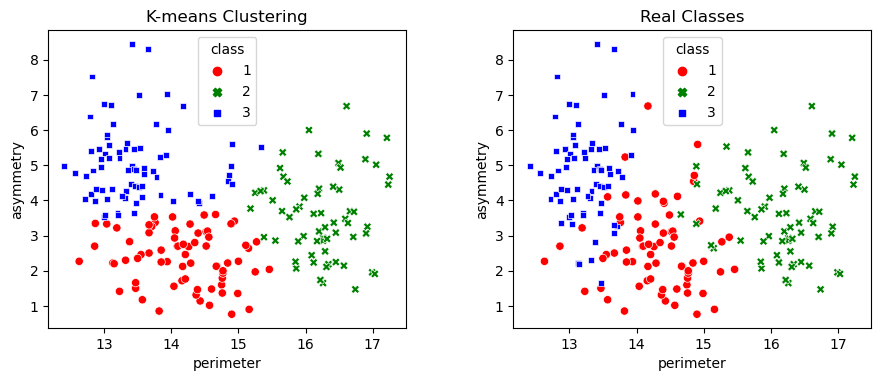

In [47]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = sns.scatterplot(

    data=cluster_df,
    x=x1, y=x2,
    hue="class",
    style="class",
    palette=["red", "green", "blue"],
)
ax.set_title("K-means Clustering")

plt.subplot(1, 2, 2)
ax = sns.scatterplot(
    data=df,
    x=x1, y=x2,
    hue="class",
    style="class",
    palette=["red", "green", "blue"],
)
ax.set_title("Real Classes")
plt.tight_layout(pad=5)
plt.show()

## K-means Clustering (based on all features)

In [31]:
x1 = "perimeter"
x2 = "asymmetry"
X = df[df.columns[:-1]].values
y = df["class"].values

In [32]:
kmeans = KMeans(n_clusters=3, n_init="auto", random_state=100)
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=100)

In [33]:
clusters = pd.Series(kmeans.labels_).map({0: 2, 1: 3, 2: 1})
clusters = clusters.to_numpy().reshape(-1, 1)

In [34]:
cluster_df = pd.DataFrame(
    np.hstack((X, clusters)),
    columns=df.columns,
)
cluster_df["class"] = cluster_df["class"].astype("int8")
cluster_df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


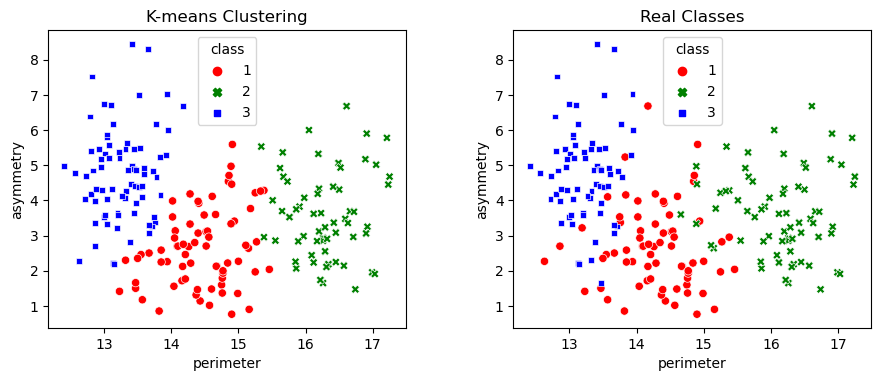

In [35]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = sns.scatterplot(

    data=cluster_df,
    x=x1, y=x2,
    hue="class",
    style="class",
    palette=["red", "green", "blue"],
)
ax.set_title("K-means Clustering")

plt.subplot(1, 2, 2)
ax = sns.scatterplot(
    data=df,
    x=x1, y=x2,
    hue="class",
    style="class",
    palette=["red", "green", "blue"],
)
ax.set_title("Real Classes")
plt.tight_layout(pad=5)
plt.show()